In [ ]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

files.upload() #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vanshikakapur24","key":"9b42fb385992016bcb6ceefae747b5b1"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 71 Aug  5 02:44 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets list

ref                                                           title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
abhayayare/employee-data-simulation-it-industry               Employee Data Simulation: IT Industry            4KB  2024-07-21 15:26:17           1599         27  1.0              
priyamchoksi/credit-card-transactions-dataset                 Credit Card Transactions Dataset               145MB  2024-07-23 00:31:47           1266         26  1.0              
waqi786/cats-dataset                                          🐾 Cats Dataset                                   6KB  2024-07-31 06:12:49           1396         28  1.0              
patricklford/global-ev-sales-2010-2024                        Global EV Sales: 2010-2024       

In [ ]:
#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle
#Downloading and unzip dataset
!kaggle datasets download -d moltean/fruits

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Kaggle'
/content
Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
 99% 957M/964M [00:12<00:00, 85.2MB/s]
100% 964M/964M [00:12<00:00, 83.0MB/s]


In [ ]:
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-o

In [ ]:
for dirname, _, filenames in os.walk('./fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

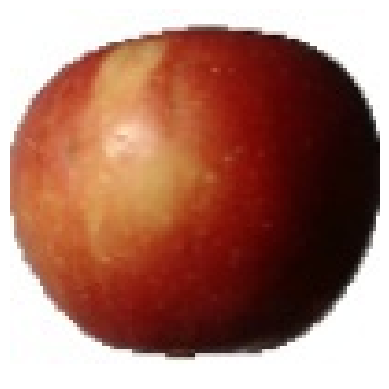

(100, 100, 3)


In [ ]:
#Setting Training & Test dir paths
train_path = '/content/fruits-360_dataset_100x100/fruits-360/Training/'
test_path = '/content/fruits-360_dataset_100x100/fruits-360/Test/'
#Displaying the image
img = load_img(train_path+"Apple Braeburn 1/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

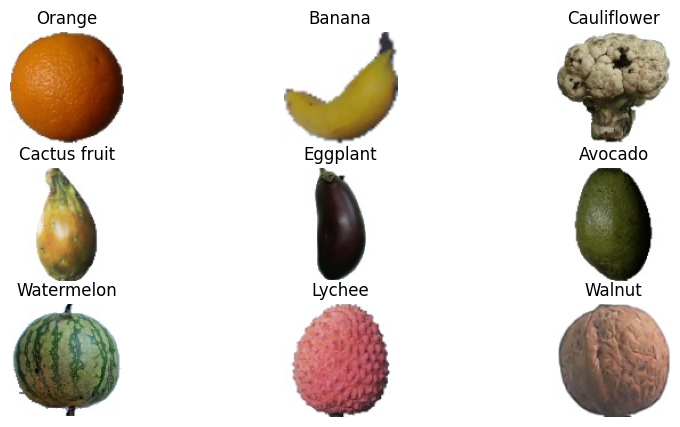

In [ ]:
#Visualizing more Images
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +" 1/0_100.jpg", target_size=(100,100)))

In [ ]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i)
        fruits_image.append(i + '/' + image_filename)
#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits

Top 10 frequent Fruits:


[('Grape Blue 1', 984),
 ('Plum 3', 900),
 ('Tomato 1', 738),
 ('Cherry Rainier 1', 738),
 ('Melon Piel de Sapo 1', 738),
 ('Cherry 2', 738),
 ('Tomato 3', 738),
 ('Strawberry Wedge 1', 738),
 ('Peach 2', 738),
 ('Walnut 1', 735)]

In [ ]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

141


In [ ]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       6,554,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 141)                 │         144,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 141)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,727,789 (25.66 MB)

 Trainable params: 6,727,789 (25.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Specifing epochs & batch size
epochs = 100
batch_size = 64

In [ ]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [23]:
#Fitting the model
hist = model.fit(
train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.0098 - loss: 4.9169 - val_accuracy: 0.0456 - val_loss: 4.5610
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.0407 - loss: 4.5080 - val_accuracy: 0.1068 - val_loss: 3.9310
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.1046 - loss: 3.9421 - val_accuracy: 0.1354 - val_loss: 3.4538
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.1402 - loss: 3.4730 - val_accuracy: 0.2109 - val_loss: 2.9869
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.1806 - loss: 3.0991 - val_accuracy: 0.2904 - val_loss: 2.5608
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2420 - loss: 2.8118 - val_accuracy: 0.3984 - val_loss: 2.1482
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2996 - loss: 2.4363 - val_accuracy: 0.5208 - val_loss: 1.8155
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3477 - loss: 2.2384 - val_accuracy: 0.5690 - val_loss: 1.5

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8062 - loss: 0.5593 - val_accuracy: 0.8480 - val_loss: 0.4853
Epoch 32/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8218 - loss: 0.5721 - val_accuracy: 0.8724 - val_loss: 0.3954
Epoch 33/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8310 - loss: 0.4811 - val_accuracy: 0.9128 - val_loss: 0.2537
Epoch 34/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8470 - loss: 0.4285 - val_accuracy: 0.7956 - val_loss: 0.7784
Epoch 35/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8457 - loss: 0.4686 - val_accuracy: 0.9102 - val_loss: 0.2858
Epoch 36/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8627 - loss: 0.4007 - val_accuracy: 0.9232 - val_loss: 0.2627
Epoch 37/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8723 - loss: 0.3621 - val_accuracy: 0.8828 - val_loss: 0.3431
Epoch 38/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8746 - loss: 0.3755 - val_accuracy: 0.9115 - val_lo

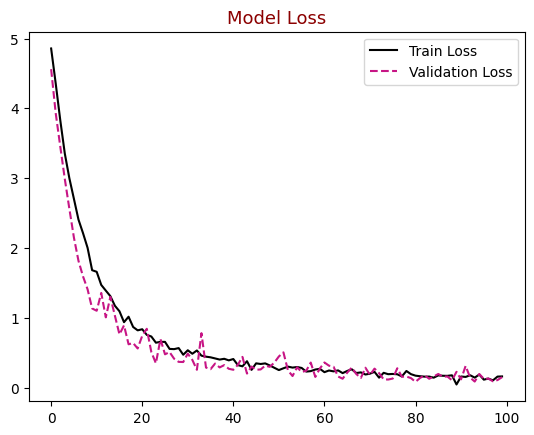

In [24]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

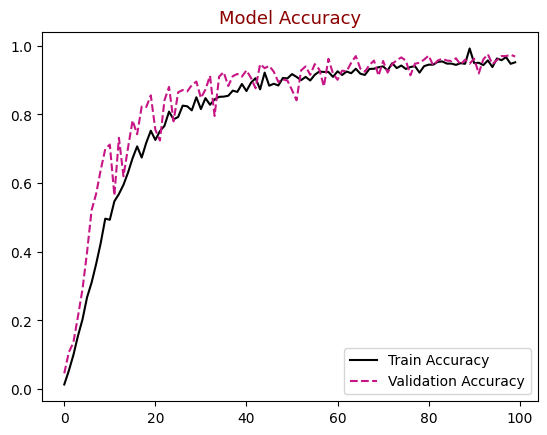

In [25]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

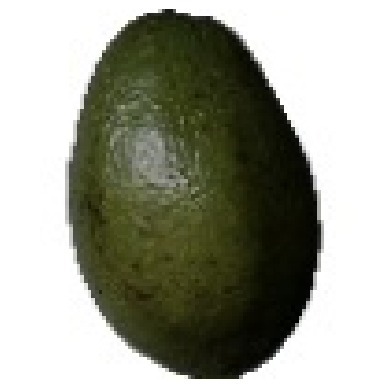

In [35]:
#Displaying the selected image
img = load_img(test_path + "/Avocado 1/53_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('/content/fruits-360_dataset_100x100/fruits-360/Test/Avocado 1/53_100.jpg')

In [36]:
#Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[16]


In [28]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple 6': 0, 'Apple Braeburn 1': 1, 'Apple Crimson Snow 1': 2, 'Apple Golden 1': 3, 'Apple Golden 2': 4, 'Apple Golden 3': 5, 'Apple Granny Smith 1': 6, 'Apple Pink Lady 1': 7, 'Apple Red 1': 8, 'Apple Red 2': 9, 'Apple Red 3': 10, 'Apple Red Delicious 1': 11, 'Apple Red Yellow 1': 12, 'Apple Red Yellow 2': 13, 'Apple hit 1': 14, 'Apricot 1': 15, 'Avocado 1': 16, 'Avocado ripe 1': 17, 'Banana 1': 18, 'Banana Lady Finger 1': 19, 'Banana Red 1': 20, 'Beetroot 1': 21, 'Blueberry 1': 22, 'Cabbage white 1': 23, 'Cactus fruit 1': 24, 'Cantaloupe 1': 25, 'Cantaloupe 2': 26, 'Carambula 1': 27, 'Carrot 1': 28, 'Cauliflower 1': 29, 'Cherry 1': 30, 'Cherry 2': 31, 'Cherry Rainier 1': 32, 'Cherry Wax Black 1': 33, 'Cherry Wax Red 1': 34, 'Cherry Wax Yellow 1': 35, 'Chestnut 1': 36, 'Clementine 1': 37, 'Cocos 1': 38, 'Corn 1': 39, 'Corn Husk 1': 40, 'Cucumber 1': 41, 'Cucumber 3': 42, 'Cucumber Ripe 1': 43, 'Cucumber Ripe 2': 44, 'Dates 1': 45, 'Eggplant 1': 46, 'Eggplant long 1': 47, 'Fig 1': 48

In [32]:
prediction = (np.argmax(model.predict(image), axis=-1))
print[test_generator.class_indices(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


TypeError: 'dict' object is not callable